In [1]:
# section 1 load all the necessary modules and packages
import glob
import time
import netCDF4 as nc4
import numpy as np
import pandas as pd
import xarray as xr
# not neccessary for the function but for visualziation
import matplotlib.pyplot as plt
import warnings
import sys
import os
import platform
import shutil


In [2]:
file_names = sorted(glob.glob('../mizuRoute/output/case_0_*.nc'))
datasets = [xr.open_dataset(file_name) for file_name in file_names]
merged_dataset = xr.concat(datasets, dim='time')
merged_dataset

<xarray.Dataset>
Dimensions:          (time: 12784, tbound: 2, hru: 518, seg: 518)
Coordinates:
  * time             (time) datetime64[ns] 1979-01-01 1979-01-02 ... 2013-12-31
Dimensions without coordinates: tbound, hru, seg
Data variables:
    time_bounds      (time, tbound) datetime64[ns] 1979-01-01 ... 2014-01-01
    basinID          (time, hru) int32 2062605 7000016 ... 2062561 2062562
    basRunoff        (time, hru) float32 0.01716 2.102 0.02492 ... 1.106 0.9838
    reachID          (time, seg) int32 2062605 7000016 ... 2062561 2062562
    IRFroutedRunoff  (time, seg) float32 0.02512 0.0 0.009651 ... 0.1971 0.2165
    IRFvolume        (time, seg) float32 0.0 5.345e+11 0.0 0.0 ... 0.0 0.0 0.0
Attributes:
    mizuRoute-version:  
    gitBranch:          cesm-coupling-0-g5ed96b5
    gitHash:            5ed96b5daab5c774e64e9f52c5a3e0efd1207765

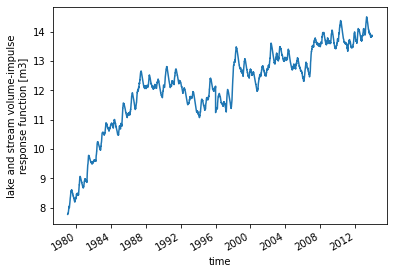

In [3]:
merged_dataset['ele'] = merged_dataset['IRFvolume']
merged_dataset['ele'][:] = merged_dataset['ele'][:]/(68800*10**6)
merged_dataset['ele'][:,1].plot()

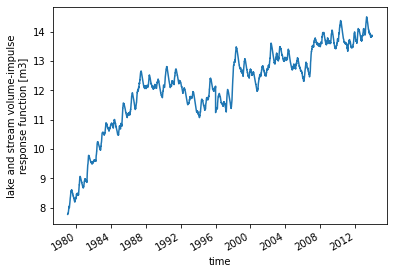

In [4]:
merged_dataset['IRFvolume'][:,1].plot()

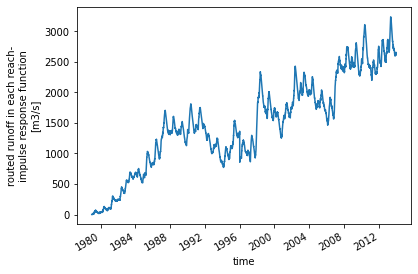

In [5]:
merged_dataset['IRFroutedRunoff'][:,0].plot()